# Task 1

In [1]:
import cv2
import numpy as np


def nothing(x):
    pass


cv2.namedWindow("Tracking")
cv2.createTrackbar("lowH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("highH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("lowS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("highS", "Tracking", 255, 255, nothing)
cv2.createTrackbar("lowV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("highV", "Tracking", 255, 255, nothing)

while True:
    input = cv2.imread(r"C:\Users\Hashii\Desktop\lab 12\smarties.JPG")

    hsv = cv2.cvtColor(input, cv2.COLOR_BGR2HSV)

    LH = cv2.getTrackbarPos("lowH", "Tracking")
    UH = cv2.getTrackbarPos("highH", "Tracking")
    LS = cv2.getTrackbarPos("lowS", "Tracking")
    US = cv2.getTrackbarPos("highS", "Tracking")
    LV = cv2.getTrackbarPos("lowV", "Tracking")
    UV = cv2.getTrackbarPos("highV", "Tracking")

    l_b = np.array([LH, LS, LV])
    u_b = np.array([UH, US, UV])

    mask = cv2.inRange(hsv, l_b, u_b)

    result = cv2.bitwise_and(input, input, mask=mask)

    cv2.imshow("input", input)
    cv2.imshow("mask", mask)
    cv2.imshow("result", result)

    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'Tracking' in function 'cvGetTrackbarPos'


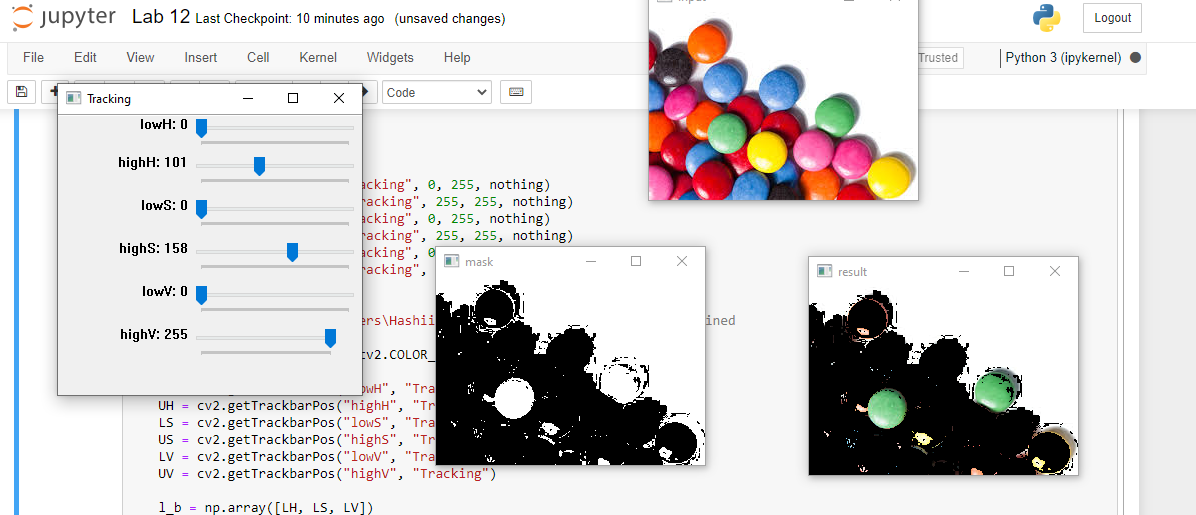

# Task 2

In [1]:
import cv2
import numpy as np 

#Read Camera
cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
def nothing(x):
    pass
#window name
cv2.namedWindow("Color Adjustments",cv2.WINDOW_NORMAL)
cv2.resizeWindow("Color Adjustments", (300, 300)) 
cv2.createTrackbar("Thresh", "Color Adjustments", 0, 255, nothing)

#COlor Detection Track

cv2.createTrackbar("Lower_H", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Lower_S", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Lower_V", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Upper_H", "Color Adjustments", 255, 255, nothing)
cv2.createTrackbar("Upper_S", "Color Adjustments", 255, 255, nothing)
cv2.createTrackbar("Upper_V", "Color Adjustments", 255, 255, nothing)


while True:
    _,frame = cap.read()
    frame = cv2.resize(frame,(400,400))
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    #detecting hand
    l_h = cv2.getTrackbarPos("Lower_H", "Color Adjustments")
    l_s = cv2.getTrackbarPos("Lower_S", "Color Adjustments")
    l_v = cv2.getTrackbarPos("Lower_V", "Color Adjustments")

    u_h = cv2.getTrackbarPos("Upper_H", "Color Adjustments")
    u_s = cv2.getTrackbarPos("Upper_S", "Color Adjustments")
    u_v = cv2.getTrackbarPos("Upper_V", "Color Adjustments")
    
    lower_bound = np.array([l_h, l_s, l_v])
    upper_bound = np.array([u_h, u_s, u_v])
    
    #Creating Mask
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    #filter mask with image
    filtr = cv2.bitwise_and(frame, frame, mask=mask)
    
    
    mask1  = cv2.bitwise_not(mask)
    m_g = cv2.getTrackbarPos("Thresh", "Color Adjustments") #getting track bar value
    ret,thresh = cv2.threshold(mask1,m_g,255,cv2.THRESH_BINARY)
    dilata = cv2.dilate(thresh,(1,1),iterations = 6)
    
    
    
    #findcontour(img,contour_retrival_mode,method)
    cnts,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    # loop over the contours
    
    for c in cnts:
        epsilon = 0.0001*cv2.arcLength(c,True)
        data= cv2.approxPolyDP(c,epsilon,True)
    
        hull = cv2.convexHull(data)
        cv2.drawContours(frame, [c], -1, (50, 50, 150), 2)
        cv2.drawContours(frame, [hull], -1, (0, 255, 0), 2)
        """
        hull = cv2.convexHull(data,returnPoints = False)
        defect = cv2.convexityDefects(data[0],hull)
        print("defect==",defect)
        """
    cv2.imshow("Thresh", thresh)
    cv2.imshow("mask==",mask)
    cv2.imshow("filter==",filtr)
    cv2.imshow("Result", frame)

    key = cv2.waitKey(25) &0xFF
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()
    

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'Color Adjustments' in function 'cvGetTrackbarPos'
